In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [20]:
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('data_train.csv')

In [4]:
df.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0


In [5]:
df.tail()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
202939,202939,0,0,1,29,0,0,0,1,0,...,10,2,0,0,8,6,7,-66,4,0
202940,202940,0,0,1,23,0,0,0,1,0,...,0,0,0,0,11,5,7,0,-84,0
202941,202941,1,1,1,38,0,0,0,1,1,...,0,2,0,1,10,6,6,-57,-16,0
202942,202942,0,1,1,22,0,0,0,1,1,...,0,14,0,0,9,6,7,59,0,0
202943,202943,0,0,1,22,0,0,0,0,0,...,2,2,0,1,5,6,8,-96,0,0


In [6]:
df.dtypes

Id                      int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
ExtraMedTest            int64
ExtraAlcoholTest        int64
Status                  int64
dtype: object

In [7]:

df.drop(['Id'], axis=1)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,24,1,0,0,1,0,1,...,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,...,30,30,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,0,1,1,27,0,0,0,1,0,1,...,0,0,0,0,9,5,4,-58,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202939,0,0,1,29,0,0,0,1,0,1,...,10,2,0,0,8,6,7,-66,4,0
202940,0,0,1,23,0,0,0,1,0,0,...,0,0,0,0,11,5,7,0,-84,0
202941,1,1,1,38,0,0,0,1,1,1,...,0,2,0,1,10,6,6,-57,-16,0
202942,0,1,1,22,0,0,0,1,1,1,...,0,14,0,0,9,6,7,59,0,0


In [8]:
# count0 = []
# for i in df['Stroke']:
#     if i == 0:
#         count0.append(i)
# print(len(count0))

In [9]:
df.shape

(202944, 25)

In [10]:
duplicate = df[df.duplicated()]
print(duplicate.shape)

(0, 25)


In [11]:
print(df.isnull().sum())

Id                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64


In [12]:
# for i in df.columns:
#     plt.figure(figsize=(20,15))

#     sns.histplot(df[i], kde=True)
#     plt.xlabel('Frequency')
#     plt.ylabel(i)
#     plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

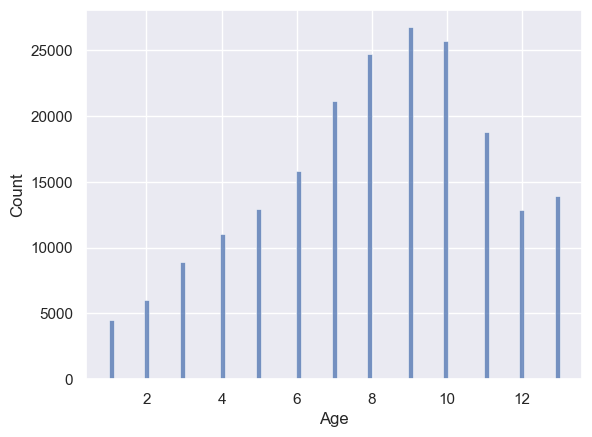

In [13]:
sns.histplot(df['Age'])

Id                         Axes(0.125,0.747241;0.133621x0.132759)
HighBP                  Axes(0.285345,0.747241;0.133621x0.132759)
HighChol                 Axes(0.44569,0.747241;0.133621x0.132759)
CholCheck               Axes(0.606034,0.747241;0.133621x0.132759)
BMI                     Axes(0.766379,0.747241;0.133621x0.132759)
Smoker                     Axes(0.125,0.587931;0.133621x0.132759)
Stroke                  Axes(0.285345,0.587931;0.133621x0.132759)
HeartDiseaseorAttack     Axes(0.44569,0.587931;0.133621x0.132759)
PhysActivity            Axes(0.606034,0.587931;0.133621x0.132759)
Fruits                  Axes(0.766379,0.587931;0.133621x0.132759)
Veggies                    Axes(0.125,0.428621;0.133621x0.132759)
HvyAlcoholConsump       Axes(0.285345,0.428621;0.133621x0.132759)
AnyHealthcare            Axes(0.44569,0.428621;0.133621x0.132759)
NoDocbcCost             Axes(0.606034,0.428621;0.133621x0.132759)
GenHlth                 Axes(0.766379,0.428621;0.133621x0.132759)
MentHlth  

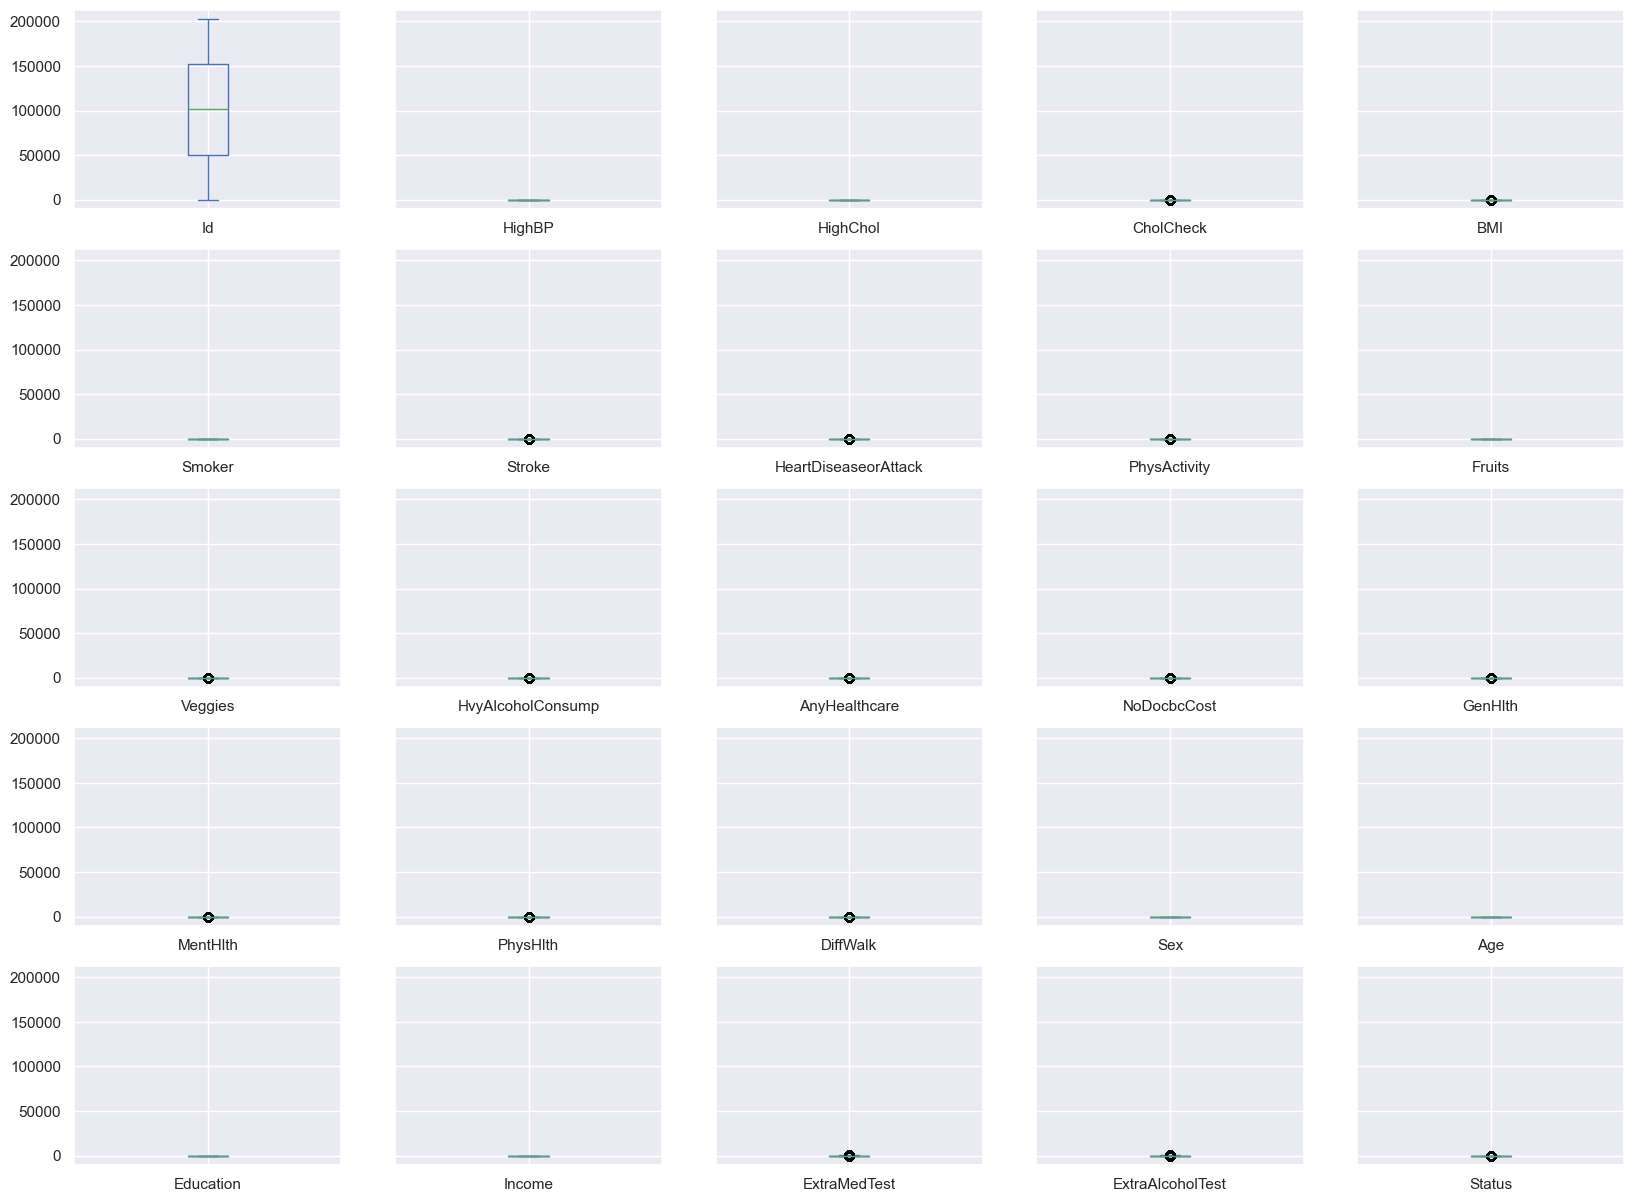

In [18]:
df.plot(kind='box', subplots=True, layout=(5,5), figsize=(20, 15), sharex=False, sharey=True)

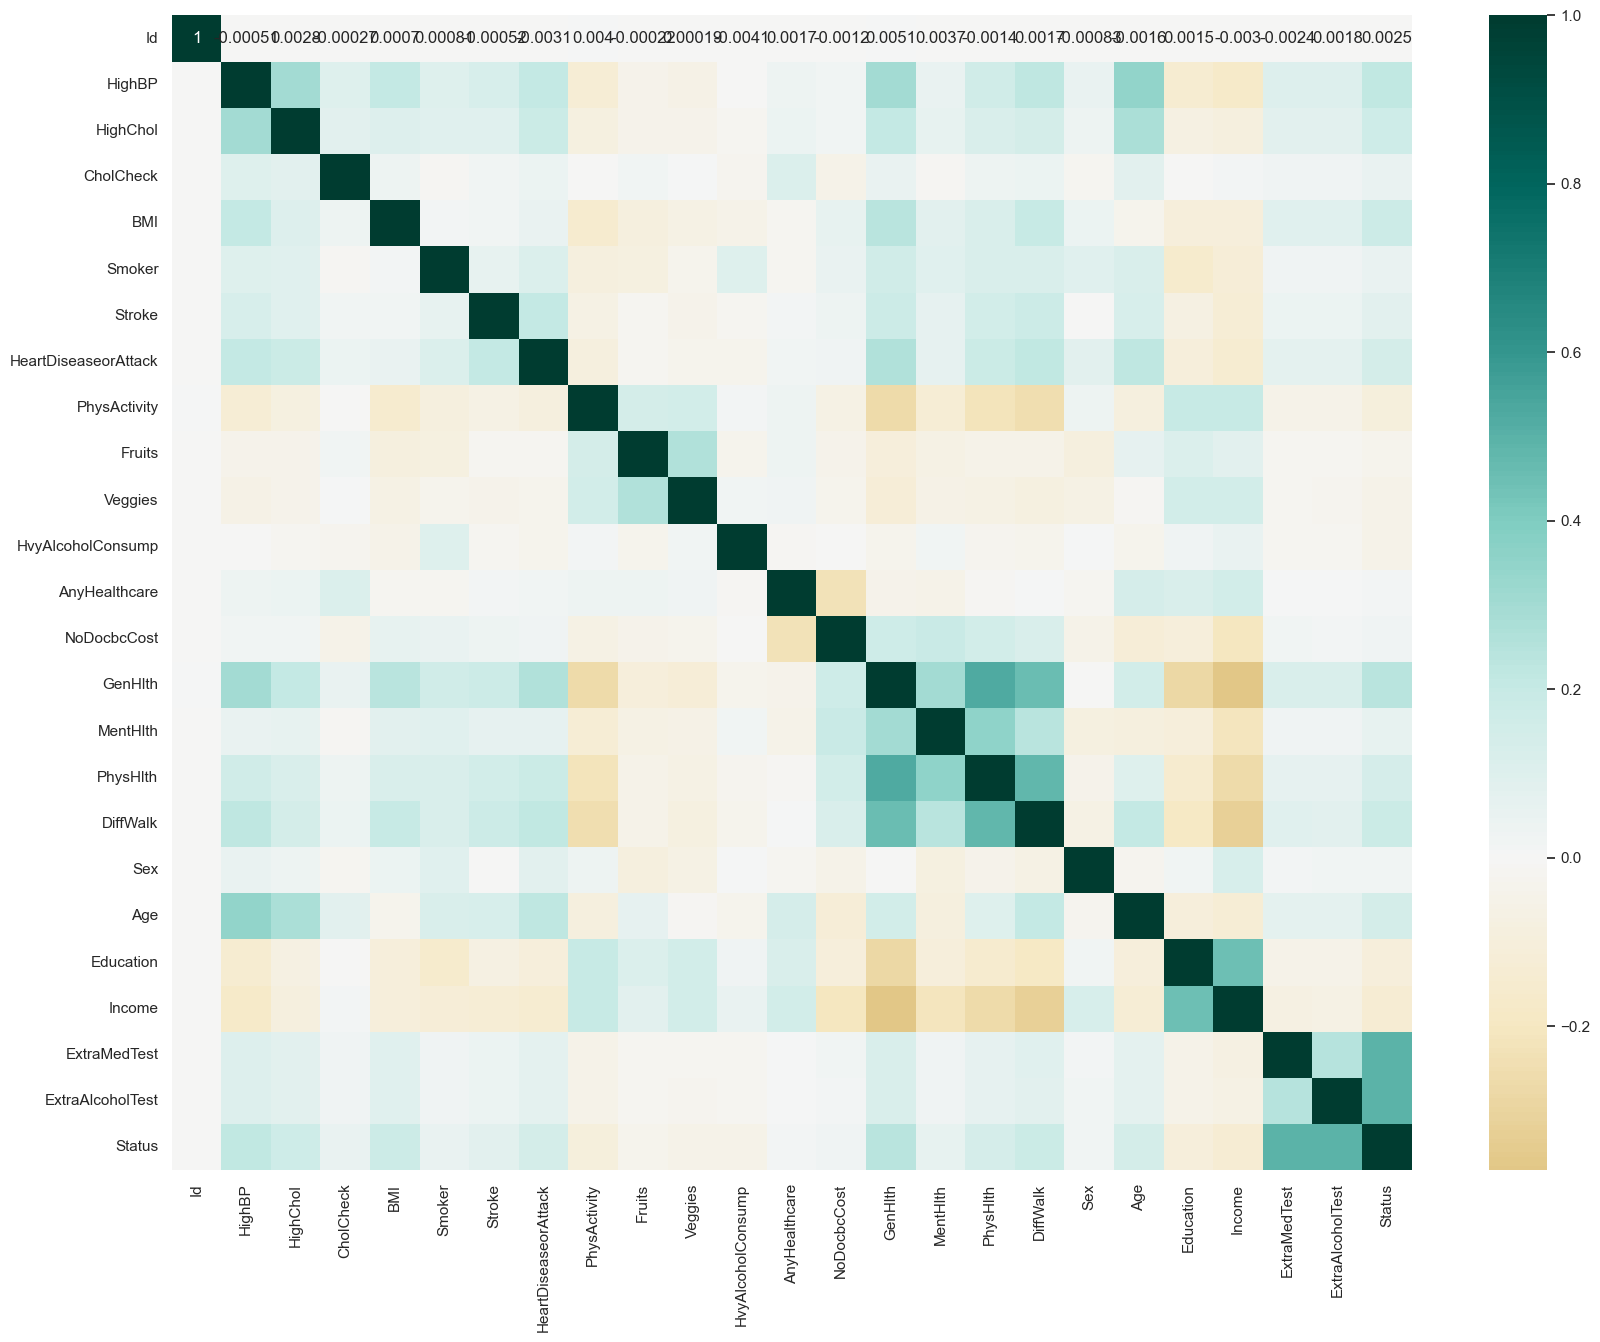

In [29]:
plt.figure(1, figsize=(20,15))
# sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)
sns.heatmap(df.corr(), cmap='BrBG', center=0, annot=True)
plt.show()

In [33]:
print(df['Sex'].unique())

[0 1]
